In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [39]:
df= pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [41]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [42]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [43]:
df['CarName']= df['CarName'].str.split(' ',expand=True)[0]

In [44]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [45]:
df['CarName']=df['CarName'].replace({'maxda': 'mazda','nissan':'Nissan','porcshe':'porshe', 'toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen'})

In [46]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

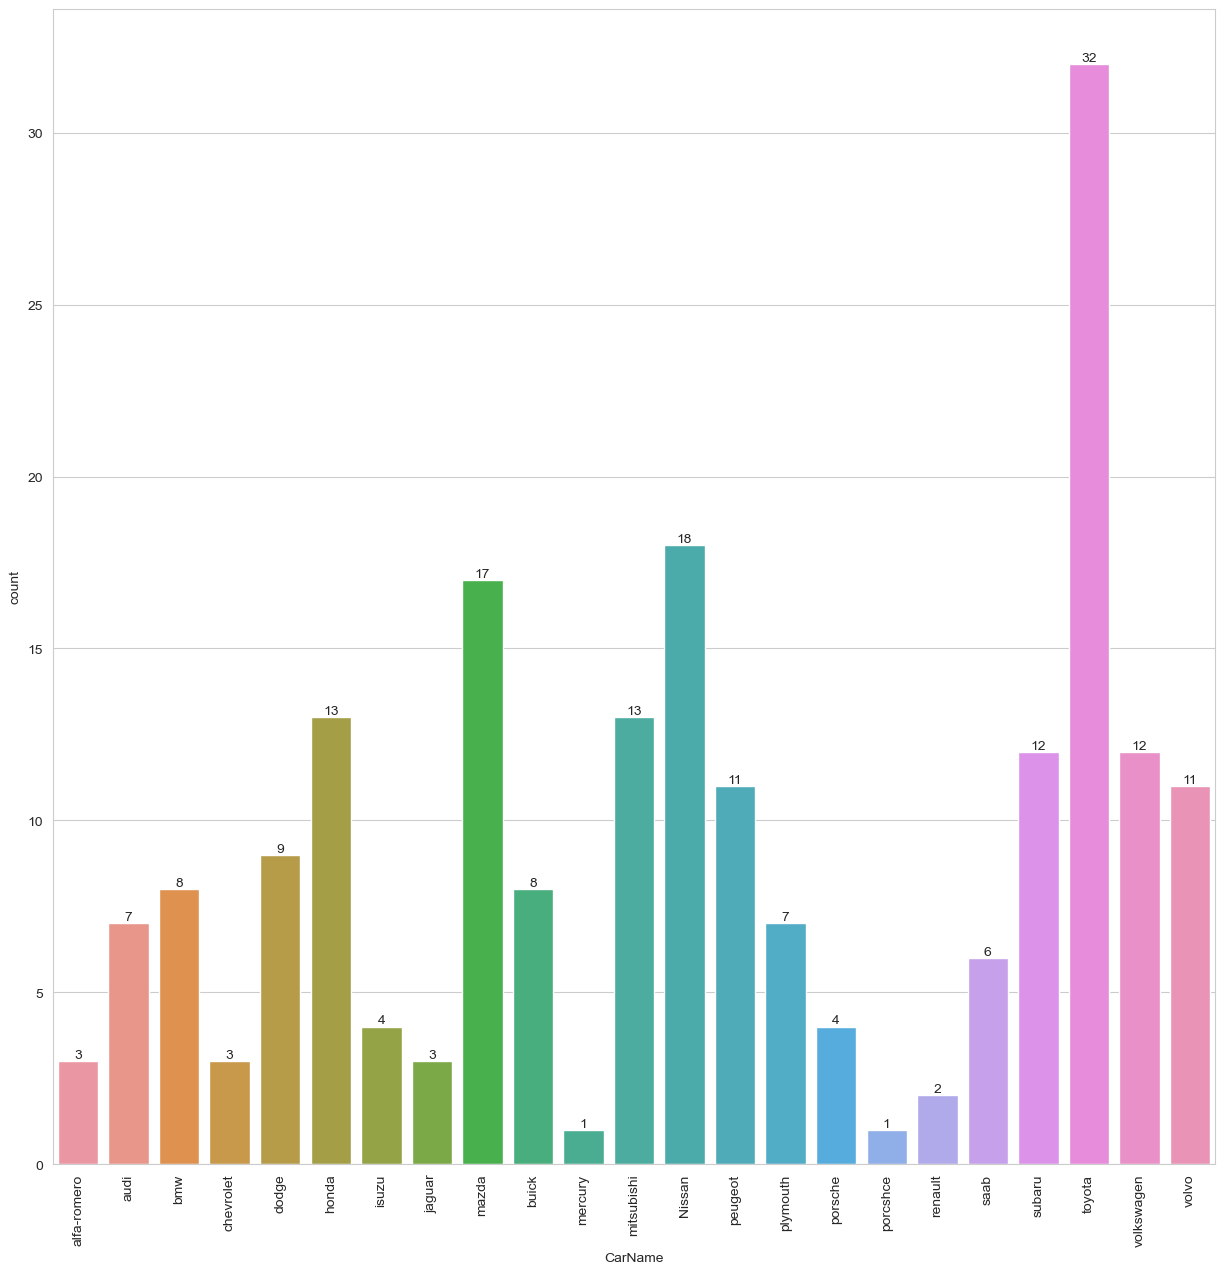

In [47]:
plt.figure(figsize=(15,15))
ax=sns.countplot(x=df['CarName']);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

C:\Users\farah\AppData\Local\Temp\ipykernel_11384\241947127.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


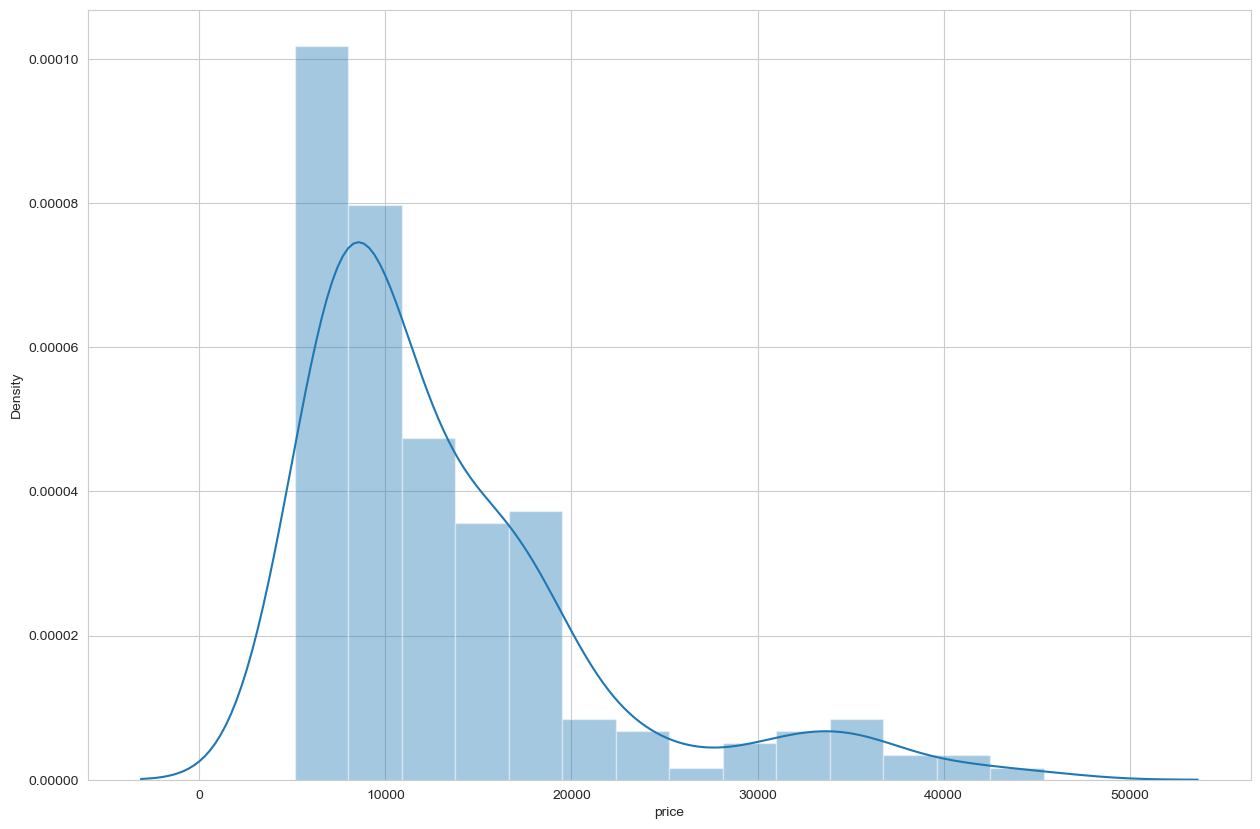

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.distplot(df.price)
plt.show()


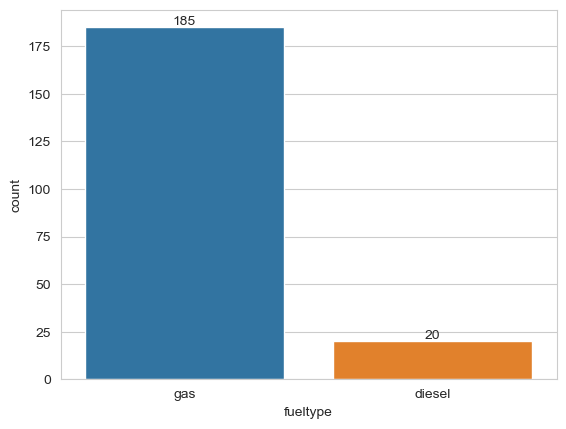

In [49]:
ax=sns.countplot(x=df['fueltype']);
ax.bar_label(ax.containers[0]);


In [50]:
# import seaborn as sns 
# sns.pairplot(df,markers=None, hue='price')
# plt.show()

In [51]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']]
new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


In [52]:
new_df = pd.get_dummies(columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'], data= new_df)
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
scaler= StandardScaler()
num_cols= ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']
new_df[num_cols]=scaler.fit_transform(new_df[num_cols])



In [54]:
x=new_df.drop(columns=['price'])
y=new_df['price']
x.shape

(205, 45)

In [55]:
y.shape

(205,)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [57]:
training_score=[]
testing_score=[]

In [58]:
from sklearn. metrics import r2_score

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred=model.predict(x_test)
    a= r2_score (y_train, x_train_pred)*100 
    b= r2_score (y_test,x_test_pred)*100
    training_score.append(a) 
    testing_score.append(b)
    print(f"r2_Score of (model) model on Training Data is:",a) 
    print(f"r2_Score of (model) model on Testing Data is: ",b)

In [59]:
from sklearn.linear_model import LinearRegression
model_prediction(LinearRegression())


r2_Score of (model) model on Training Data is: 92.52761715043437
r2_Score of (model) model on Testing Data is:  88.66738397403333


In [60]:
from sklearn.tree import DecisionTreeRegressor
model_prediction(DecisionTreeRegressor())

r2_Score of (model) model on Training Data is: 99.86537119069865
r2_Score of (model) model on Testing Data is:  88.23616870706333


In [61]:
from sklearn.ensemble import RandomForestRegressor
model_prediction(RandomForestRegressor())

r2_Score of (model) model on Training Data is: 98.58069531803879
r2_Score of (model) model on Testing Data is:  95.0173429398828


In [62]:
#!pip install catboost

In [63]:
from catboost import CatBoostRegressor
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of (model) model on Training Data is: 99.66964225930734
r2_Score of (model) model on Testing Data is:  94.23459506019563


In [65]:
models= ['Linear Regression','Decision Tree','Random Forest','CatBoost']

In [67]:
df1=pd.DataFrame({'Algorithms':models,'Training Score':training_score,'Testing Score':testing_score})
df1

,Algorithms,Training Score,Testing Score
0,Linear Regression,92.527617,88.667384
1,Decision Tree,99.865371,88.236169
2,Random Forest,98.580695,95.017343
3,CatBoost,99.669642,94.234595


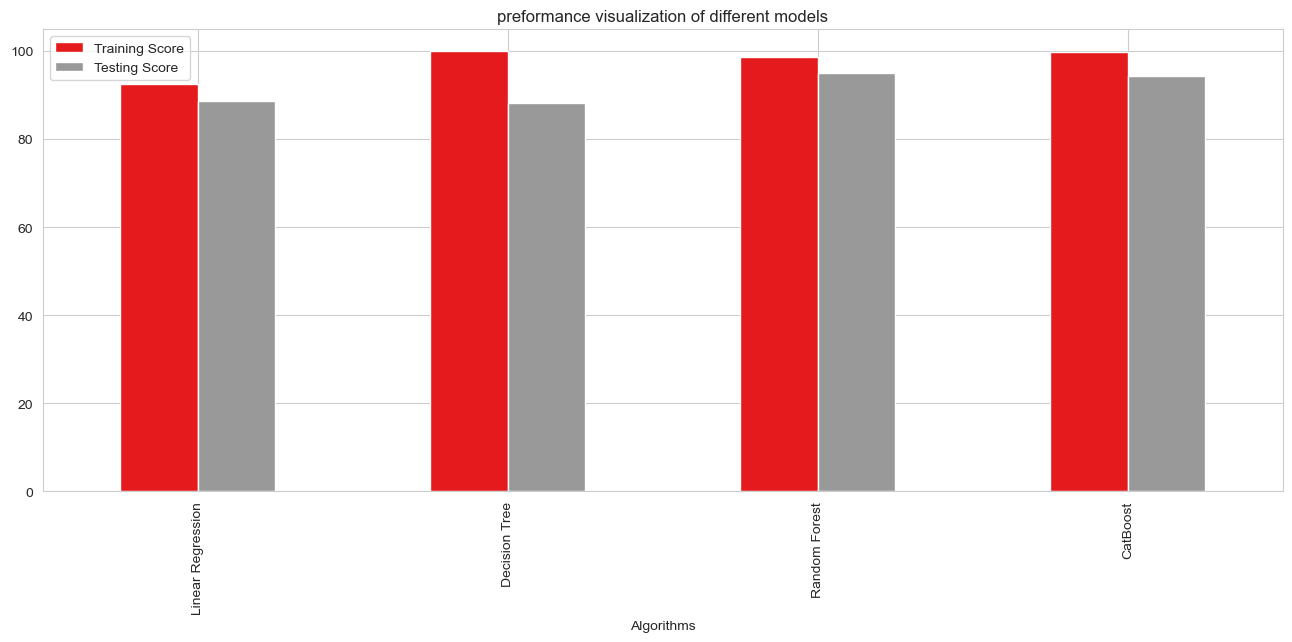

In [71]:
df1.plot(x='Algorithms',y=['Training Score','Testing Score'],figsize=(16,6),kind='bar',title='preformance visualization of different models',colormap='Set1')
plt.show()